<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 4

#### Por Matías Marfisi


![Consigna](Desarrollo/Consigna.png "Consigna")

#### Obtención plantilla normalizada

![Plantilla normalizada](Desarrollo/1.jpg "Plantilla normalizada")

![Plantilla normalizada](Desarrollo/2.jpg "Plantilla normalizada")

#### Obtención transferencia pasabajos que satisface requerimientos filtro pasabanda

![Transferencia pasabajos](Desarrollo/3.jpg "Transferencia pasabajos")

![Transferencia pasabajos](Desarrollo/4.jpg "Transferencia pasabajos")

![Transferencia pasabajos](Desarrollo/5.jpg "Transferencia pasabajos")

#### Obtención transferencia pasabanda

![Transferencia pasabanda](Desarrollo/6.jpg "Transferencia pasabanda")

![Transferencia pasabanda](Desarrollo/7.jpg "Transferencia pasabanda")

#### Implementación mediante secciones pasivas separadas por seguidores de tensión activos

![Secciones pasivas](Desarrollo/8.jpg "Secciones pasivas")

![Secciones pasivas](Desarrollo/9.jpg "Secciones pasivas")

#### Activación de las redes pasivas

![Activación](Desarrollo/10.jpg "Activacion")

![Activación](Desarrollo/11.jpg "Activacion")

#### Simulación

In [4]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

In [ ]:
den3 = np.array([1, 1.252, 4.531, 2.504 + 0.715/Q, 4.531, 1.252, 1])
polos = np.roots(den3)
print(polos)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

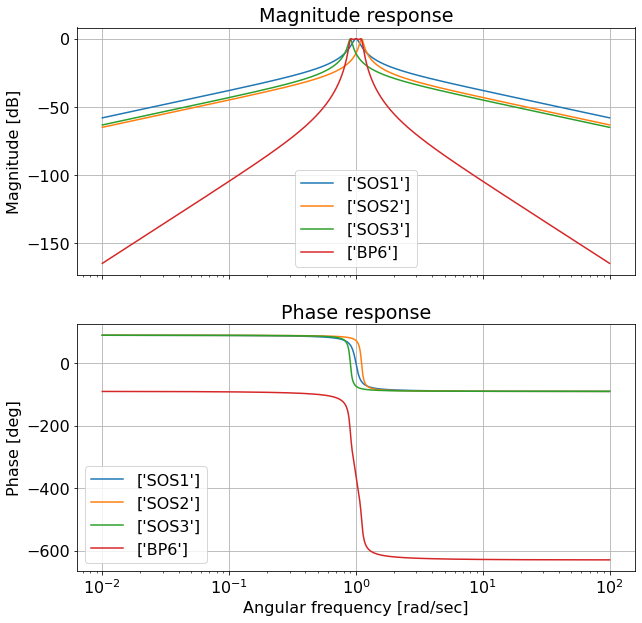

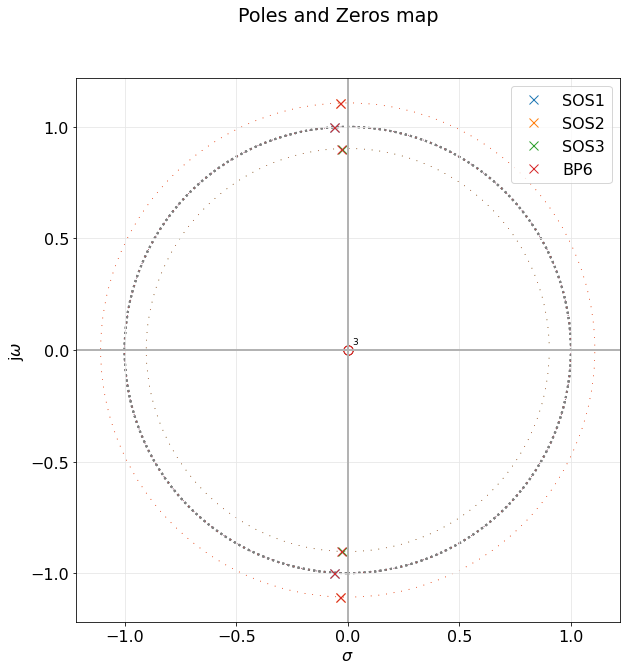

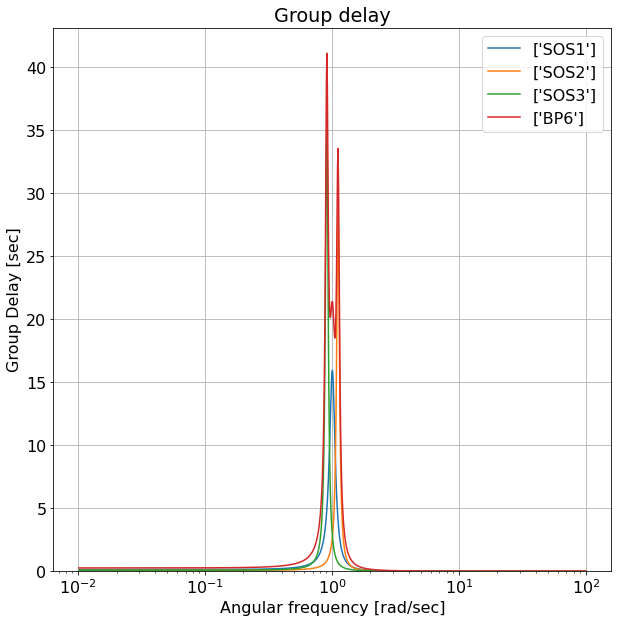

In [19]:
from splane import analyze_sys, pretty_print_bicuad_omegayq
# Comienzo Ejercicio
R1 = 1
C1 = 0.9
L1 = 1.548
R2 = 1
C2 = 2.188
L2 = 0.641

Q = 5

num1 = np.array([0.1253, 0])
den1 = np.array([1, 0.1253, 1])
num2 = np.array([0.069, 0])
den2 = np.array([1, 0.069, 1.226])
num3 = np.array([0.056, 0])
den3 = np.array([1, 0.056, 0.8154])

num4 = np.array([0.715/Q**3, 0, 0, 0])
den4 = np.array([1, 1.252/Q, 3 + 1.531/Q**2, 2.504/Q + 0.715/Q**3, 3 + 1.531/Q**2, 1.252/Q, 1])

sos_1 = sig.TransferFunction(num1,den1)
sos_2 = sig.TransferFunction(num2,den2)
sos_3 = sig.TransferFunction(num3,den3)
bp_cheby_6 = sig.TransferFunction(num4, den4)

all_sos = [sos_1, sos_2, sos_3, bp_cheby_6]

pretty_print_bicuad_omegayq(num1,den1)
pretty_print_bicuad_omegayq(num2,den2)
pretty_print_bicuad_omegayq(num3,den3)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1','SOS2','SOS3','BP6'])

#### Simulaciones en Spice

##### Simulación circuito pasivo

![Circuito Pasivo](Simulaciones/Circuito_Pasivo.png "Circuito Pasivo")

![Circuito Pasivo](Simulaciones/Atenuacion_Pasivo.png "Circuito Pasivo")

Podemos observar que se cumple con lo especificado en la plantilla, teniendo -26dB en 17KHz, superando los -16dB especificados. Y por otro lado, -45dB en 36KHz, superando los -24dB pedidos.

![Circuito Pasivo](Simulaciones/Ripple_Pasivo.png "Circuito Pasivo")

El ripple en la banda de paso es de 1.65dB, sin cumplir los 0.5dB pedidos. Esto puede deberse al propio comportamiento de los circuitos pasivos y la atenuación que involucran los mismos

##### Simulación circuito activo

![Circuito Activo](Simulaciones/Circuito_Activado.png "Circuito Activo")

![Circuito Activo](Simulaciones/Atenuacion_Activado.png "Circuito Activo")

Podemos observar que se cumple con lo especificado en la plantilla, teniendo -27dB en 17KHz, superando los -16dB especificados. Y por otro lado, -45dB en 36KHz, superando los -24dB pedidos.

![Circuito Activo](Simulaciones/Ripple_Activado.png "Circuito Activo")

El ripple en la banda de paso es de 1.16dB, sin cumplir los 0.5dB pedidos. Puede adjudicarse al redondeo de valores y al error en los modelos de SPICE.